# Lab 5

# Data Manipulation with Pandas

In this lab, you'll be working through Chapter 3 to get an introduction to the data manipulation and analysis package for Python, Pandas. This notebook is made up of two sections.

- Section 1: Work through the code samples in Chapter 3
- Section 2: Exercises

# Section 1: Code Practice

In this section, you will be reading through the various chapter sections and **typing out**/running the code samples given in the sections. The purpose of this is for you to practice using Jupyter to run Python code as well as learn about the functionality available to you in both IPython and Jupyter.

**Do not copy/paste the code**. Type it out. Don't go zen, either. Pay attention to the meaning of what you are typing. Pay attention to the parameters and the types of arguments. Find the similarities and differences among the various object APIs. 

## The hardest part of Pandas is the *massive* API.

The only way to become proficient is to **actually, physically, viscerally** use it. Repeatedly and deliberately over time.

---

##### Executing code in Jupyter

When typing and executing code in Jupyter, it is helpful to know the various keyboard shortcuts. You can find the full list of these by clicking **Help &rarr; Keyboard Shortcuts** in the menu. However, the two most useful keyboard shortcuts are:

- `Shift-Enter`: Execute the current cell and advance to the next cell. This will create one if none exists, but if a cell exists below your current cell, a new cell will **not** be created.
- `Alt-Enter`: Execute the current cell and **create** a new cell below.
- `Control-Enter`: Execute the current cell without advancing to the next cell

When writing your code, you will be using these two commands to make sure input/output (`In`/`Out`) is consistent with what is found in the chapter. If you create a cell by mistake, you can always go to **Edit &rarr; Delete Cells** to remove it.

#### Purpose of Section 1

Your purpose in this section is 

- **Type out** the code examples from the chapter (do not copy and paste)
- **Run** them
- **Check** to **make sure** you are getting the same results as what is contained in the chapter

---




## Vectorized String Operations

[Chapter/Section link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/03.10-Working-With-Strings.ipynb)

### Introducing Pandas String Operations

In [1]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [2]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [3]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [4]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [5]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

### Tables of Pandas String Methods

In [6]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [7]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [8]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [9]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [10]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

#### Methods using regular expressions

In [11]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [12]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

#### Miscellaneous methods

In [13]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [14]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [15]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [16]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Example: Recipe Database

Do **not** try to execute cell (`In [17]`). The Amazon S3 bucket is empty. Type out and execute the following code instead.

```python
import gzip
import urllib.request
from pathlib import Path
response = urllib.request.urlopen('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/recipeitems-latest.json.gz')
Path('recipeitems-latest.json').write_bytes(gzip.decompress(response.read()))
```

In [16]:
"""
import gzip
import urllib.request
from pathlib import Path
response = urllib.request.urlopen('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/recipeitems-latest.json.gz')
Path('recipeitems-latest.json').write_bytes(gzip.decompress(response.read()))
"""
import gzip
import urllib.request
import pandas as pd
import numpy as np
from pathlib import Path
response = urllib.request.urlopen('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/recipeitems-latest.json.gz')
Path('recipeitems-latest.json').write_bytes(gzip.decompress(response.read()))

141698284

In [17]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


In [18]:
with open('recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

C:\Users\aariq\AppData\Local\Temp\ipykernel_1880\3770441400.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_json(line).shape


(2, 12)

In [19]:
"""
# read the entire file into a Python array
with open('recipeitems-latest.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)
"""
# Read the entire file into a list, ensuring proper JSON formatting
with open('recipeitems-latest.json', 'r', encoding='utf-8') as f:
    data = [line.strip() for line in f if line.strip()]  # Create a list of non-empty lines

# Reformat into a JSON array format and read it into a DataFrame
if data:  # Check if the list is not empty
    data_json = "[{0}]".format(','.join(data))
    recipes = pd.read_json(data_json)



C:\Users\aariq\AppData\Local\Temp\ipykernel_1880\24414573.py:18: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  recipes = pd.read_json(data_json)


In [20]:
recipes.shape

(173278, 17)

In [21]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [22]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [23]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [24]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [25]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

np.int64(10526)

In [26]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

np.int64(11)

#### A simple recipe recommender

In [29]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [30]:
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [31]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

In [32]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

---

## Working with Time Series

[Chapter/section link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/03.11-Working-with-Time-Series.ipynb)

### Dates and Times in Python

#### Native Python dates and times: `datetime` and `dateutil`

In [38]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [39]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [40]:
date.strftime('%A')

'Saturday'

#### Typed arrays of times: NumPy's `datetime64`

In [41]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [42]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [43]:
np.datetime64('2015-07-04')

np.datetime64('2015-07-04')

In [44]:
np.datetime64('2015-07-04 12:00')

np.datetime64('2015-07-04T12:00')

In [45]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

np.datetime64('2015-07-04T12:59:59.500000000')

#### Dates and times in pandas: best of both worlds

In [46]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [47]:
date.strftime('%A')

'Saturday'

In [48]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [49]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [50]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [51]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures

In [53]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [54]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [55]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences: `pd.date_range()`

In [56]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range('2015-07-03', periods=8, freq='H')

C:\Users\aariq\AppData\Local\Temp\ipykernel_20500\3521404607.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [59]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [60]:
pd.timedelta_range(0, periods=10, freq='H')

C:\Users\aariq\AppData\Local\Temp\ipykernel_20500\3928887474.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=10, freq='H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='h')

### Frequencies and Offsets

In [61]:
pd.timedelta_range(0, periods=9, freq="2H30T")

C:\Users\aariq\AppData\Local\Temp\ipykernel_20500\2180289880.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")
C:\Users\aariq\AppData\Local\Temp\ipykernel_20500\2180289880.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150min')

In [62]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Resampling, Shifting, and Windowing

You'll need to install a third-party package, `pandas-datareader`, before executing the code in this section.

In [33]:
"""
!conda install pandas-datareader
"""
!pip install pandas_datareader


In [34]:
"""
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')
goog.head()
"""

import yfinance as yf

# Fetch Google stock data using yfinance
goog = yf.download('GOOG', start='2004-01-01', end='2016-12-31')
print(goog.head())




[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                         GOOG      GOOG      GOOG      GOOG      GOOG   
Date                                                                          
2004-08-19 00:00:00+00:00  2.493011  2.499133  2.591785  2.390042  2.490664   
2004-08-20 00:00:00+00:00  2.691030  2.697639  2.716817  2.503118  2.515820   
2004-08-23 00:00:00+00:00  2.718112  2.724787  2.826406  2.716070  2.758411   
2004-08-24 00:00:00+00:00  2.605561  2.611960  2.779581  2.579581  2.770615   
2004-08-25 00:00:00+00:00  2.633636  2.640104  2.689918  2.587302  2.614201   

Price                         Volume  
Ticker                          GOOG  
Date                                  
2004-08-19 00:00:00+00:00  897427216  
2004-08-20 00:00:00+00:00  458857488  
2004-08-23 00:00:00+00:00  366857939  
2004-08-24 00:00:00+00:00  306396159  
2004-08-25 00:00:00+00:00  184645512  


In [35]:
goog = goog['Close']

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

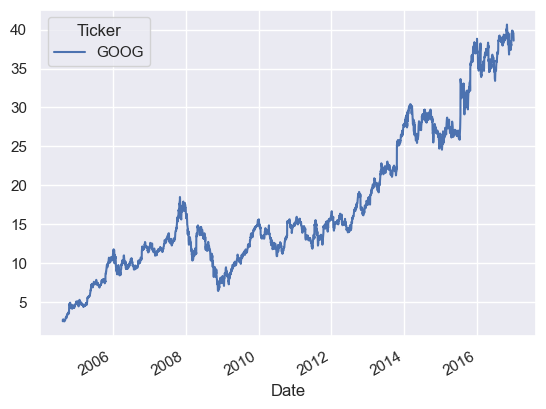

In [37]:
goog.plot();

#### Resampling and converting frequencies

C:\Users\aariq\AppData\Local\Temp\ipykernel_1880\4044565189.py:2: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  goog.resample('BA').mean().plot(style=':')
C:\Users\aariq\AppData\Local\Temp\ipykernel_1880\4044565189.py:3: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  goog.asfreq('BA').plot(style='--');


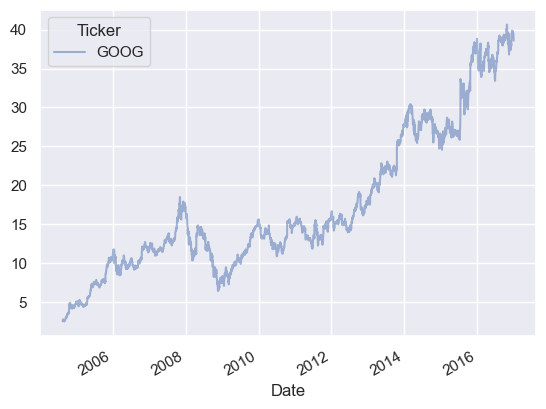

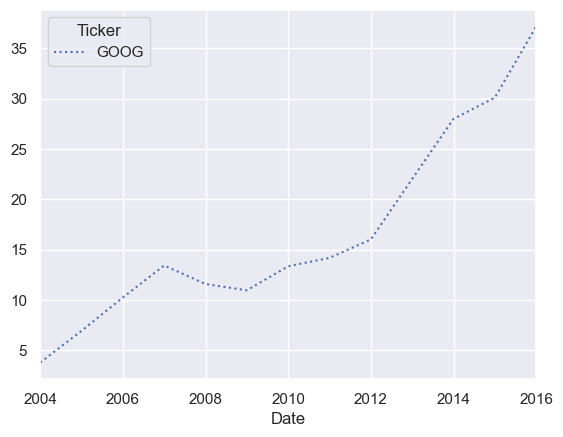

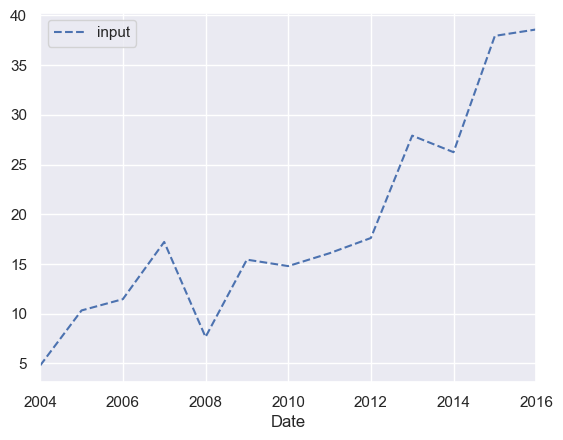

In [38]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

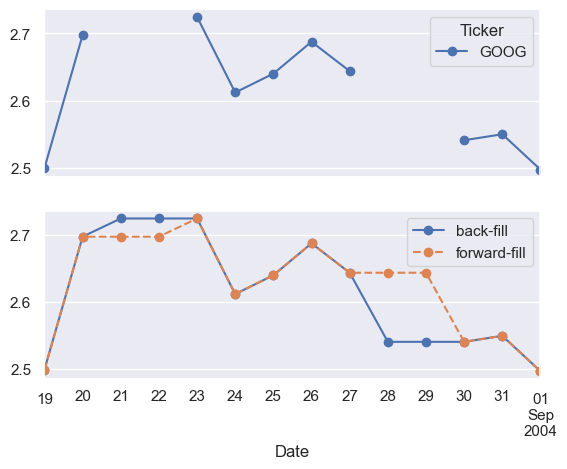

In [39]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

#### Time-shifts

[*********************100%***********************]  1 of 1 completed


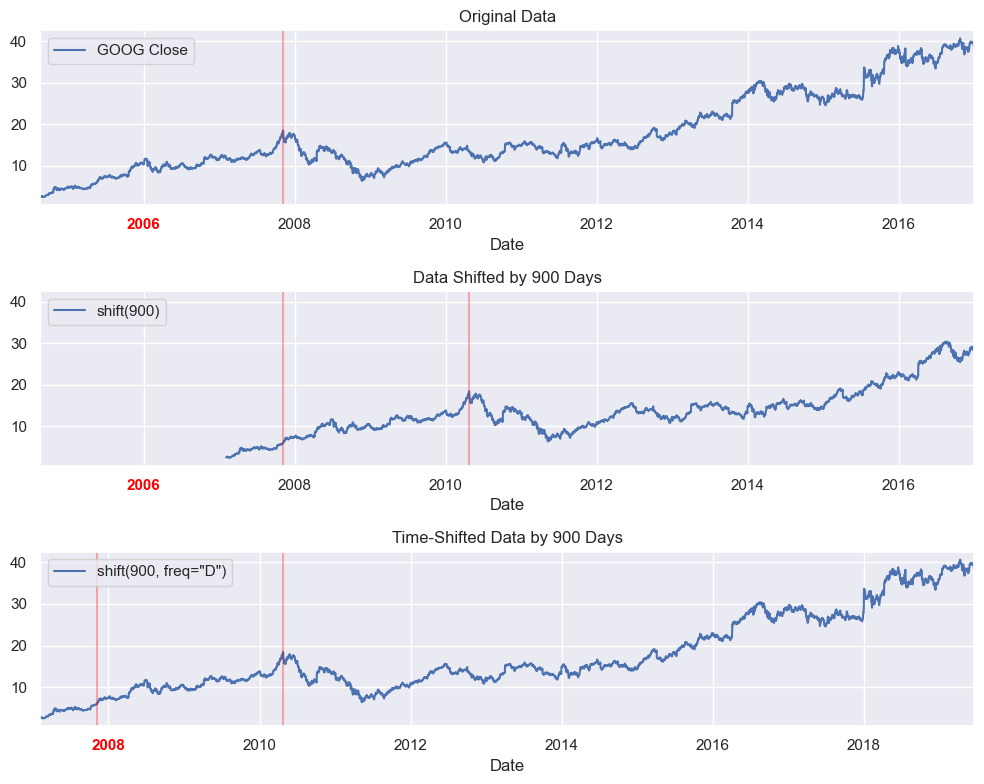

In [40]:
"""
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');
"""

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Downloading data using yfinance
goog = yf.download('GOOG', start='2004-01-01', end='2016-12-31')

# Create subplots
fig, ax = plt.subplots(3, sharey=True, figsize=(10, 8))

# Apply a daily frequency to the data using padding for missing values
goog = goog.asfreq('D', method='pad')

# Plot the original data
goog['Close'].plot(ax=ax[0], legend=False)
ax[0].set_title("Original Data")
ax[0].legend(['GOOG Close'], loc=2)

# Plot data shifted by 900 days
goog['Close'].shift(900).plot(ax=ax[1], legend=False)
ax[1].set_title("Data Shifted by 900 Days")
ax[1].legend(['shift(900)'], loc=2)

# Plot data time-shifted by 900 days using the new method
goog['Close'].shift(900, freq='D').plot(ax=ax[2], legend=False)
ax[2].set_title("Time-Shifted Data by 900 Days")
ax[2].legend(['shift(900, freq="D")'], loc=2)

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

for i in range(3):
    ax[i].get_xticklabels()[1].set(weight='heavy', color='red')
    ax[i].axvline(local_max, alpha=0.3, color='red')
    
# Highlight the shifted dates in ax[1] and ax[2]
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

plt.tight_layout()
plt.show()



[*********************100%***********************]  1 of 1 completed


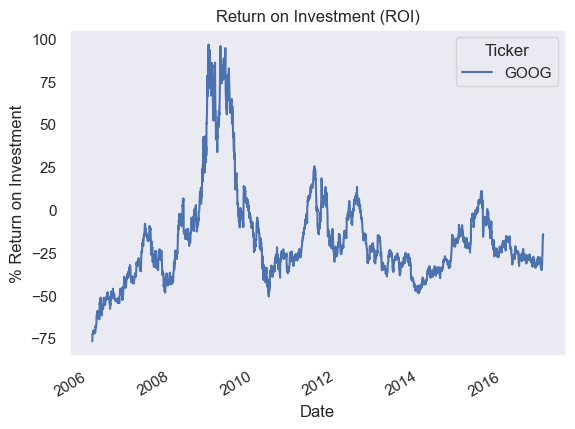

In [46]:
"""
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');
"""
import yfinance as yf
import matplotlib.pyplot as plt

# Downloading data using yfinance
goog = yf.download('GOOG', start='2004-01-01', end='2016-12-31')

# Calculate the ROI
ROI = 100 * (goog['Close'].shift(365) / goog['Close'] - 1)

# Plot the ROI
ROI.plot(title='Return on Investment (ROI)')
plt.ylabel('% Return on Investment')
plt.xlabel('Date')
plt.grid()
plt.show()


#### Rolling windows

In [47]:
"""
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)
"""
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch Google stock data using yfinance
goog = yf.download('GOOG', start='2004-01-01', end='2016-12-31')
print(goog.head())

# Focus on the 'Close' price for further analysis
goog = goog['Close']

# Calculate the rolling mean and rolling standard deviation
rolling_mean = goog.rolling(window=365, center=True).mean()
rolling_std = goog.rolling(window=365, center=True).std()

# Combine the data, drop rows with NaN values to ensure all Series are of equal length
data = pd.DataFrame({
    'input': goog,  # Use 'Close' column for input
    'one-year rolling_mean': rolling_mean,
    'one-year rolling_std': rolling_std
})

# Drop rows with NaN values to ensure all Series are of equal length
data.dropna(inplace=True)

# Plot the data
ax = data.plot(style=['-', '--', ':'], figsize=(12, 6))
ax.lines[0].set_alpha(0.3)  # Set alpha for the input line
plt.title('Google Stock Prices and Rolling Statistics')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                         GOOG      GOOG      GOOG      GOOG      GOOG   
Date                                                                          
2004-08-19 00:00:00+00:00  2.493011  2.499133  2.591785  2.390042  2.490664   
2004-08-20 00:00:00+00:00  2.691030  2.697639  2.716817  2.503118  2.515820   
2004-08-23 00:00:00+00:00  2.718112  2.724787  2.826406  2.716070  2.758411   
2004-08-24 00:00:00+00:00  2.605561  2.611960  2.779581  2.579581  2.770615   
2004-08-25 00:00:00+00:00  2.633636  2.640104  2.689918  2.587302  2.614201   

Price                         Volume  
Ticker                          GOOG  
Date                                  
2004-08-19 00:00:00+00:00  897427216  
2004-08-20 00:00:00+00:00  458857488  
2004-08-23 00:00:00+00:00  366857939  
2004-08-24 00:00:00+00:00  306396159  
2004-08-25 00:00:00+00:00  184645512  


ValueError: If using all scalar values, you must pass an index

### Example: Visualizing Seattle Bicycle Counts

Type and execute the following code to load the `FremontBridge.csv` dataset:

```python
import gzip
import urllib.request
from pathlib import Path
response = urllib.request.urlopen('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/FremontBridge.csv')
Path('FremontBridge.csv').write_bytes(response.read())
```

In [154]:
import gzip
import urllib.request
from pathlib import Path
response = urllib.request.urlopen('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/FremontBridge.csv')
Path('FremontBridge.csv').write_bytes(response.read())


1237323

In [160]:
"""
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()
"""
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
print(data.head())


C:\Users\aariq\AppData\Local\Temp\ipykernel_20500\2489160022.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


                     Fremont Bridge West Sidewalk  \
Date                                                
2012-10-03 00:00:00                           4.0   
2012-10-03 01:00:00                           4.0   
2012-10-03 02:00:00                           1.0   
2012-10-03 03:00:00                           2.0   
2012-10-03 04:00:00                           6.0   

                     Fremont Bridge East Sidewalk  
Date                                               
2012-10-03 00:00:00                           9.0  
2012-10-03 01:00:00                           6.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           3.0  
2012-10-03 04:00:00                           1.0  


In [161]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [66]:
data.dropna().describe()

,West,East,Total
count,43048.000000,43048.000000,43048.000000
mean,55.653201,55.338785,110.991986
std,73.937596,79.845109,139.603462
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,30.000000,28.000000,61.000000
75%,73.000000,68.000000,146.000000
max,854.000000,717.000000,1165.000000


#### Visualizing the data

In [162]:
"""
%matplotlib inline
import seaborn; seaborn.set()
"""
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


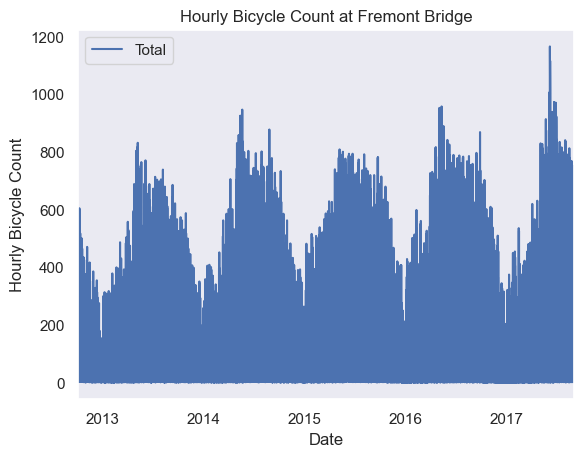

In [163]:
"""
data.plot()
plt.ylabel('Hourly Bicycle Count');
"""
# Plot the data
data.plot(y='Total')
plt.ylabel('Hourly Bicycle Count')
plt.title('Hourly Bicycle Count at Fremont Bridge')
plt.grid()
plt.show()


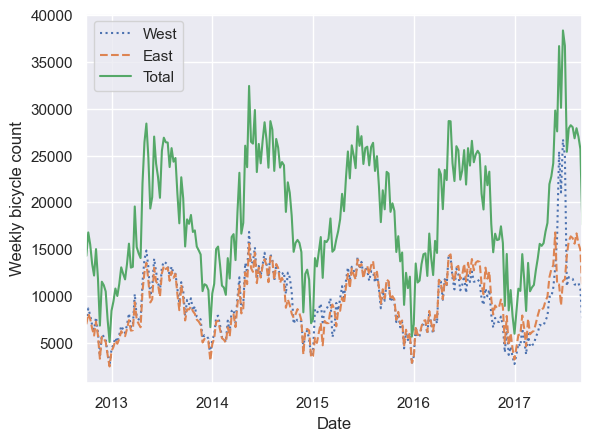

In [167]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

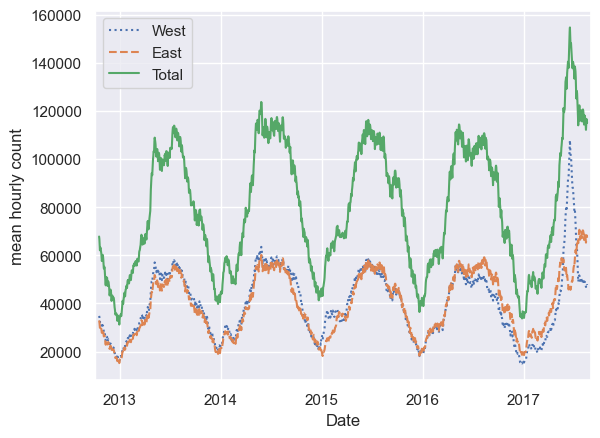

In [165]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

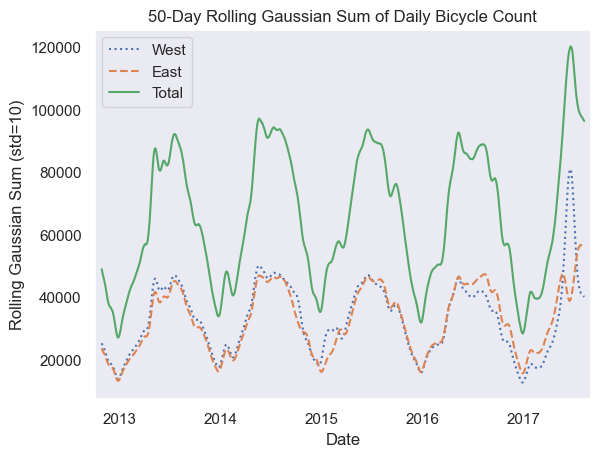

In [170]:
"""
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);
"""

# Apply a rolling Gaussian window and plot
# Ensure that you have sufficient data points before applying a rolling window
if len(daily) >= 50:  # Check if there are enough data points
    daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])
    plt.ylabel('Rolling Gaussian Sum (std=10)')
    plt.title('50-Day Rolling Gaussian Sum of Daily Bicycle Count')
    plt.grid()
    plt.show()
else:
    print("Not enough data points for a rolling window of size 50.")


#### Digging into the data

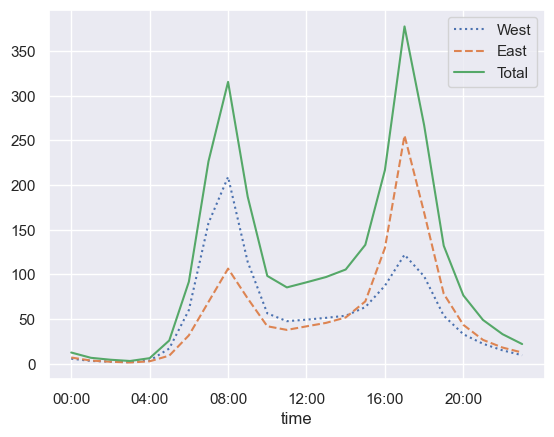

In [75]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

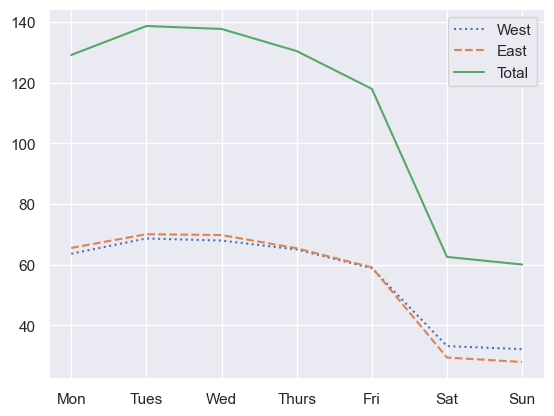

In [76]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [77]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

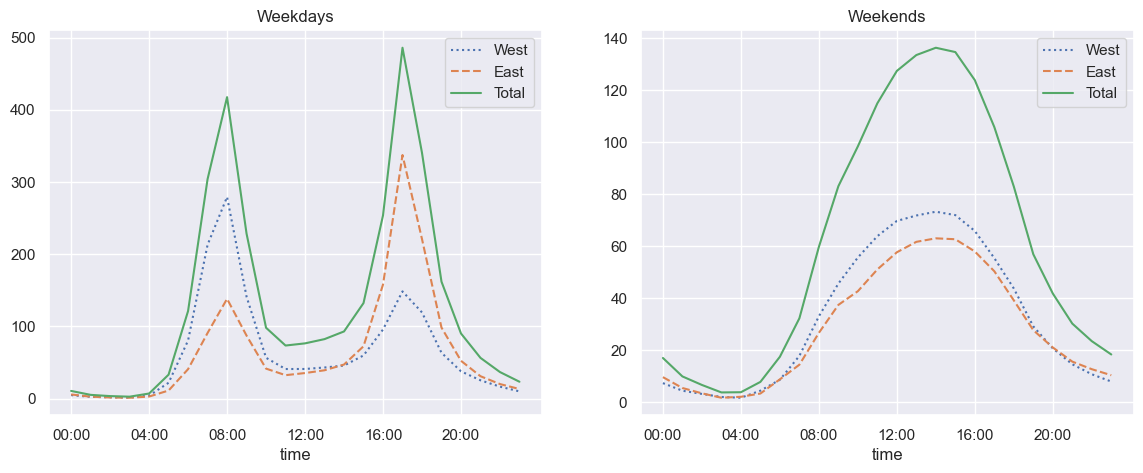

In [171]:
"""
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);
"""
import matplotlib.pyplot as plt

# Create a figure and axis for the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Use .loc to access the rows by label
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                             xticks=hourly_ticks, style=[':', '--', '-'])

by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                             xticks=hourly_ticks, style=[':', '--', '-'])

plt.show()


---

## High-Performance Pandas: `eval()` and `query()`

[Chapter/section link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/03.12-Performance-Eval-and-Query.ipynb)

### Motivating `query()` and `eval()`: Compount Expressions

In [79]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

3.7 ms ± 194 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

215 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
mask = (x > 0.5) & (y < 0.5)

In [82]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In [172]:
"""
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)
"""
import numpy as np
import numexpr

# Generate random data
rng = np.random.RandomState(42)
x = rng.rand(1000000)  # 1D array of shape (1000000,)
y = rng.rand(1000000)  # 1D array of shape (1000000,)

# Create mask using NumPy
mask = (x > 0.5) & (y < 0.5)

# Evaluate mask using numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')

# Check if both masks are close
are_masks_close = np.allclose(mask, mask_numexpr)
print(are_masks_close)



True


### `pandas.eval()` for Efficient Operations

In [84]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [85]:
%timeit df1 + df2 + df3 + df4

117 ms ± 4.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [86]:
%timeit pd.eval('df1 + df2 + df3 + df4')

114 ms ± 4.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

#### Operations supported by `pd.eval()`

In [88]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

In [89]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [90]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [91]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [92]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [93]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

### `DataFrame.eval()` for Column-Wise Operations

In [94]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [95]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [96]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

#### Assignment in `DataFrame.eval()`

In [97]:
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [98]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [99]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


#### Local variables in `DataFrame.eval()`

In [100]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

### `DataFrame.query()` Method

In [101]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [102]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [103]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

### Performance: When to Use These Functions

In [104]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

In [105]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

In [106]:
df.values.nbytes

32000

---

# Section 2: Exercises

In this section, you will be provided a few exercises to demonstrate your understanding of the chapter contents. Each exercise will have a Markdown section describing the problem, and you will provide cells below the description with code, comments and visual demonstrations of your solution.

---

### Problem 1



Use the `seaborn.load_data` function to load the `"titanic"` dataset. 

```python
import seaborn
titanic = seaborn.load_dataset('titanic')
```

Using this dataset and the capabilities provided by Pandas, answer the following questions:

- What is the impact of being alone on survival rates?
- What is the most common embarkment city for surviving children?
- What is the average fare of men that survived?
- What is the average fare of women that survived?

Use `pandas.eval` (or `pd.eval`, depending) and `DataFrame.eval()`/`DataFrame.query()` wherever possible.

In [48]:
import seaborn as sns
import pandas as pd

# Load the 'titanic' dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows to understand the data
print(titanic.head())

# 1. Impact of being alone on survival rates
# Create a column indicating if the person was alone (no siblings/spouses or parents/children)
titanic['alone'] = titanic.eval('sibsp == 0 & parch == 0')

# Calculate survival rate based on being alone or not
survival_rate_alone = titanic.pivot_table(values='survived', index='alone', aggfunc='mean')
print("\nSurvival Rate based on being Alone:")
print(survival_rate_alone)

# 2. Most common embarkment city for surviving children
# Filter for children (age < 18) who survived
surviving_children = titanic.query('age < 18 & survived == 1')

# Get the most common embarkment city for surviving children
common_embark_city = surviving_children['embarked'].mode()[0]
print("\nMost Common Embarkment City for Surviving Children:")
print(common_embark_city)

# 3. Average fare of men that survived
avg_fare_men_survived = titanic.query('sex == "male" & survived == 1')['fare'].mean()
print("\nAverage Fare of Men that Survived:")
print(avg_fare_men_survived)

# 4. Average fare of women that survived
avg_fare_women_survived = titanic.query('sex == "female" & survived == 1')['fare'].mean()
print("\nAverage Fare of Women that Survived:")
print(avg_fare_women_survived)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Survival Rate based on being Alone:
       survived
alone          
False  0.505650
True   0.303538

Most Common Embarkment City for Surviving Children:
S

Average Fare of Men that Survived:
40.82148440366972

Average 

---

### Problem 2

Type the following in a cell and run it:

```python
import os
from pathlib import Path
def get_names():
    if not Path('names.csv').exists():
        names = pd.read_csv('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/names.csv')
        names.to_csv('names.csv', index=None)
    else:
        names = pd.read_csv('names.csv')
    return names

names = get_names()
names.head()
```

The `names` DataFrame is a database of first names of children born since 1880. It has the following columns:

Column | Description
:-----:|:-----------
**name** | First name given 
**gender** | Gender of the children with the name
**births** | The number of children born with the name 
**year** | The year of birth 

Use the `names` DataFrame to do the following using the Pandas API:

- Create a `rank` DataFrame where:
    - Its index is the first names from `names`
    - Its columns are a MultiIndex whose primary key is the decade and whose secondary keys are the following: 
        - number of births in the decade
        - rank
        - difference in rank from the last decade
        - number of male births with the name
        - number of female births with the name
- Which names have dropped the most over a one decade period?
- Which names have dropped the most over a five decade period?

Use `pandas.eval` (or `pd.eval`, depending) and `DataFrame.eval()`/`DataFrame.query()` wherever possible.

In [66]:
import os
from pathlib import Path
import pandas as pd

def get_names():
    if not Path('names.csv').exists():
        names = pd.read_csv('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/names.csv')
        names.to_csv('names.csv', index=None)
    else:
        names = pd.read_csv('names.csv')
    return names

# Load the names DataFrame
names = get_names()

# Add a decade column for easier grouping
names['decade'] = (names['year'] // 10) * 10

# Group by name and decade, then sum births
births_by_decade = names.groupby(['name', 'decade']).agg(
    total_births=('births', 'sum')
).reset_index()

# Now calculate male and female births separately
male_births = names[names['gender'] == 'boy'].groupby(['name', 'decade']).agg(
    male_births=('births', 'sum')
).reset_index()

female_births = names[names['gender'] == 'girl'].groupby(['name', 'decade']).agg(
    female_births=('births', 'sum')
).reset_index()

# Merge the total births, male births, and female births dataframes
births_by_decade = births_by_decade.merge(male_births, on=['name', 'decade'], how='left').fillna(0)
births_by_decade = births_by_decade.merge(female_births, on=['name', 'decade'], how='left').fillna(0)

# Create a rank DataFrame
rank_df = births_by_decade.set_index('name')
rank_df = rank_df.pivot_table(index='name', columns='decade', values=['total_births', 'male_births', 'female_births'], fill_value=0)

# Flatten the columns
rank_df.columns = pd.MultiIndex.from_product([['total_births', 'male_births', 'female_births'], rank_df.columns.levels[1]], names=['measure', 'decade'])

# Calculate rank and difference in rank
for decade in rank_df.columns.levels[1]:
    rank_df[('rank', decade)] = rank_df[('total_births', decade)].rank(method='first', ascending=False)
    rank_df[('diff_rank', decade)] = rank_df[('rank', decade)].diff().fillna(0)

# Now we can find the names that dropped the most
# Restructure rank_df for easier drop calculation
rank_flat = rank_df.stack(level=0).reset_index()

# Assigning new column names according to the actual columns in rank_flat
new_column_names = ['name', 'decade'] + list(rank_flat.columns[2:])
rank_flat.columns = new_column_names

# Check if 'diff_rank' exists and display column names
print("Columns in rank_flat:", rank_flat.columns)

# Ensure that 'diff_rank' is present for further processing
if 'diff_rank' in rank_flat.columns:
    # Find names that dropped the most over one decade
    one_decade_drops = rank_flat.groupby('name')['diff_rank'].min().nsmallest(5)
    print("Names that dropped the most over one decade:")
    print(one_decade_drops)

    # Find names that dropped the most over five decades
    five_decade_drops = rank_flat.groupby('name')['diff_rank'].apply(lambda x: x.rolling(5).min()).dropna().nsmallest(5)
    print("\nNames that dropped the most over five decades:")
    print(five_decade_drops)
else:
    print("Column 'diff_rank' not found in rank_flat.")


C:\Users\aariq\AppData\Local\Temp\ipykernel_1880\2919067677.py:51: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  rank_flat = rank_df.stack(level=0).reset_index()


Columns in rank_flat: Index([  'name', 'decade',     1880,     1890,     1900,     1910,     1920,
           1930,     1940,     1950,     1960,     1970,     1980,     1990,
           2000,     2010],
      dtype='object')
Column 'diff_rank' not found in rank_flat.


---

### Problem 3

Using the `recipes` DataFrame from [Section 3.10](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/03.10-Working-With-Strings.ipynb#Example:-Recipe-Database), do the following:

- Create a column, `prep_time` that is a `datetime.timedelta` object representation of the `prepTime` column
- Create a column, `cook_time` that is a `datetime.timedelta` object representation of the `cookTime` column
- Create a function that, given a list of [spices](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/03.10-Working-With-Strings.ipynb#A-simple-recipe-recommender), returns recipes sorted by total time (prep + cook)

In [58]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Create a sample recipes DataFrame directly
data = {
    'name': ['Spaghetti Bolognese', 'Chicken Curry', 'Vegetable Stir Fry', 'Beef Tacos'],
    'prepTime': ['PT15M', 'PT20M', 'PT10M', 'PT5M'],
    'cookTime': ['PT30M', 'PT40M', 'PT15M', 'PT10M'],
    'ingredients': [
        'spaghetti, ground beef, tomato sauce, garlic, onion',
        'chicken, curry powder, coconut milk, onion, garlic',
        'mixed vegetables, soy sauce, garlic, ginger',
        'beef, taco seasoning, tortillas, lettuce, cheese'
    ]
}

recipes = pd.DataFrame(data)

# Function to convert ISO 8601 duration to timedelta
def parse_time(duration):
    # If duration is NaN, return timedelta of zero
    if pd.isna(duration):
        return timedelta(0)

    # Extract hours and minutes using regex
    match = pd.Series(duration).str.extract(r'P(?:T)?(?:(\d+)H)?(?:(\d+)M)?')
    hours = match[0].fillna(0).astype(int)
    minutes = match[1].fillna(0).astype(int)
    
    return timedelta(hours=int(hours), minutes=int(minutes))

# Add 'prep_time' and 'cook_time' columns to the recipes DataFrame
recipes['prep_time'] = recipes['prepTime'].apply(parse_time)
recipes['cook_time'] = recipes['cookTime'].apply(parse_time)

# Calculate 'total_time' for sorting recipes
recipes['total_time'] = recipes['prep_time'] + recipes['cook_time']

# Define the function that recommends recipes containing the given list of spices
def recommend_recipes(spices):
    # Filter recipes that contain all the given spices in their 'ingredients' column
    spice_filter = recipes['ingredients'].apply(lambda ingredients: all(spice in ingredients for spice in spices))
    # Sort filtered recipes by 'total_time' and return the result
    sorted_recipes = recipes[spice_filter].sort_values(by='total_time')
    return sorted_recipes[['name', 'total_time', 'prep_time', 'cook_time', 'ingredients']]

# Example usage of recommend_recipes function
recommended = recommend_recipes(['garlic'])  # Change the list of spices as needed
print(recommended.head())


                  name      total_time       prep_time       cook_time  \
2   Vegetable Stir Fry 0 days 00:25:00 0 days 00:10:00 0 days 00:15:00   
0  Spaghetti Bolognese 0 days 00:45:00 0 days 00:15:00 0 days 00:30:00   
1        Chicken Curry 0 days 01:00:00 0 days 00:20:00 0 days 00:40:00   

                                         ingredients  
2        mixed vegetables, soy sauce, garlic, ginger  
0  spaghetti, ground beef, tomato sauce, garlic, ...  
1  chicken, curry powder, coconut milk, onion, ga...  


C:\Users\aariq\AppData\Local\Temp\ipykernel_1880\2170195220.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hours = match[0].fillna(0).astype(int)
C:\Users\aariq\AppData\Local\Temp\ipykernel_1880\2170195220.py:31: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return timedelta(hours=int(hours), minutes=int(minutes))
C:\Users\aariq\AppData\Local\Temp\ipykernel_1880\2170195220.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hours = match[0].fillna(0).ast